<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Проверим-долю-обогащения-золота" data-toc-modified-id="Проверим-долю-обогащения-золота-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим долю обогащения золота</a></span></li><li><span><a href="#Анализ-недостающих-признаков-в-тестовой-выборке" data-toc-modified-id="Анализ-недостающих-признаков-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ недостающих признаков в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Фунцция-метрик-sMAPE-и-итогового-sMAPE" data-toc-modified-id="Фунцция-метрик-sMAPE-и-итогового-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Фунцция метрик sMAPE и итогового sMAPE</a></span></li><li><span><a href="#Расчет-модели-на-тренировочных-данных" data-toc-modified-id="Расчет-модели-на-тренировочных-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчет модели на тренировочных данных</a></span></li><li><span><a href="#Расчет-на-тестовых-данных" data-toc-modified-id="Расчет-на-тестовых-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет на тестовых данных</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Цель работы: подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

print(train_df.shape)
print(test_df.shape)
print(full_df.shape)

(14149, 87)
(5290, 53)
(19439, 87)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
pd.set_option('display.max_rows', None)

In [7]:
train_df.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

In [8]:
test_df.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

### Проверим долю обогащения золота

In [9]:
recovery = (train_df['rougher.output.concentrate_au'] * (train_df['rougher.input.feed_au'] - train_df['rougher.output.tail_au'])) / (train_df['rougher.input.feed_au'] * (train_df['rougher.output.concentrate_au'] - train_df['rougher.output.tail_au'])) * 100

0         87.107763
1         86.843261
2         86.842308
3         87.226430
4         86.688794
5         88.156912
6         88.168065
7         87.668336
8         87.035862
9         87.650868
10        88.280699
11        88.499117
12        89.299981
13        89.519701
14        87.235441
15        85.136294
16        85.443505
17        86.489827
18        85.462226
19        86.241795
20        86.582578
21        86.824119
22        88.132239
23        85.910498
24        86.262377
25        87.561100
26        87.580848
27        87.107693
28        87.431708
29        86.798211
30        88.066903
31        88.804718
32        89.964407
33        86.303989
34        87.298278
35        85.448045
36        87.323840
37        88.151219
38        88.012961
39        85.633837
40        85.017832
41        87.941479
42        86.205601
43        82.078433
44        91.408585
45        -0.000000
46        -0.000000
47        -0.000000
48        -0.000000
49        -0.000000


In [10]:
mae_recovery = mean_absolute_error(train_df['rougher.output.recovery'], recovery)
print('MAE', mae_recovery.round(2))

MAE 0.0


In [11]:
full_df.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

**Вывод:** как показывает вычесление MAE, значения в rougher.output.recovery верны

### Анализ недостающих признаков в тестовой выборке

Мы видим что в тестовой выборке отсутвуют признаки финальных характеристик такие как выходные и расчетные характеристики

### Предобработка данных

In [12]:
train_df.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

In [13]:
test_df.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [14]:
full_df.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

In [15]:
train_df = train_df.ffill()

In [16]:
test_df = test_df.ffill()

In [17]:
full_df = full_df.ffill()

In [18]:
train_df.duplicated().sum()

0

In [19]:
test_df.duplicated().sum()

0

In [20]:
full_df.duplicated().sum()

0

**Вывод:** данных не мало, пропусков было не так уж и много и все успешно были закрыте, без потери данных

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [21]:
zero_point = []
for i in full_df.index:
    if (full_df.loc[i,'rougher.input.feed_au'] == 0.0 or
       full_df.loc[i,'rougher.output.concentrate_au'] == 0.0 or
       full_df.loc[i,'primary_cleaner.output.concentrate_au'] == 0.0 or
       full_df.loc[i,'final.output.concentrate_au'] == 0.0 or
        
       full_df.loc[i,'rougher.input.feed_ag'] == 0.0 or
       full_df.loc[i,'rougher.output.concentrate_ag'] == 0.0 or
       full_df.loc[i,'primary_cleaner.output.concentrate_ag'] == 0.0 or
       full_df.loc[i,'final.output.concentrate_ag'] == 0.0 or
       
       full_df.loc[i,'rougher.input.feed_pb'] == 0.0 or
       full_df.loc[i,'rougher.output.concentrate_pb'] == 0.0 or
       full_df.loc[i,'primary_cleaner.output.concentrate_pb'] == 0.0 or
       full_df.loc[i,'final.output.concentrate_au'] == 0.0):
    
        zero_point.append(full_df.loc[i,'date'])

In [22]:
train_df.drop(train_df[train_df['date'].isin(zero_point)].index, inplace=True)
test_df.drop(test_df[test_df['date'].isin(zero_point)].index, inplace=True)
full_df.drop(full_df[full_df['date'].isin(zero_point)].index, inplace=True)

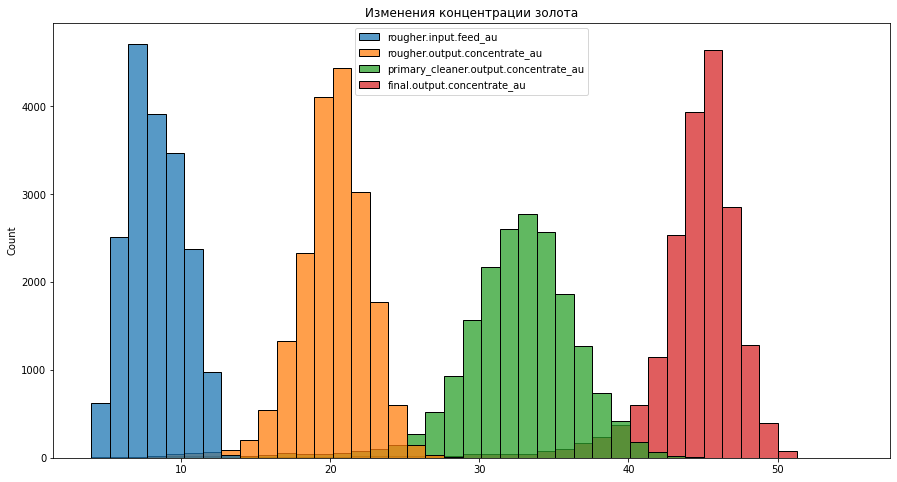

In [58]:
hist_au = full_df[['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
plt.figure(figsize=(15,8))
ax = sns.histplot(data=hist_au, binrange=(4,55)).set(title='Изменения концентрации золота');


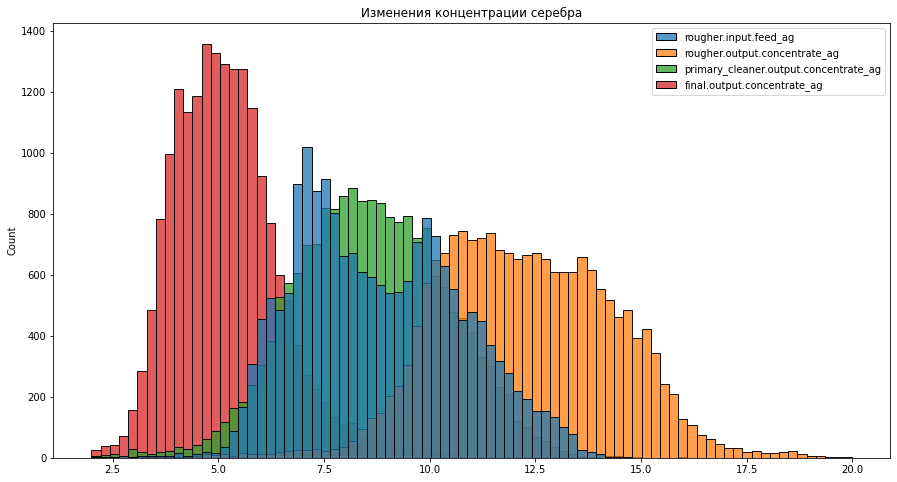

In [60]:
hist_ag = full_df[['rougher.input.feed_ag','rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
plt.figure(figsize=(15,8))
ax = sns.histplot(data=hist_ag, binrange=(2,20)).set(title='Изменения концентрации серебра');

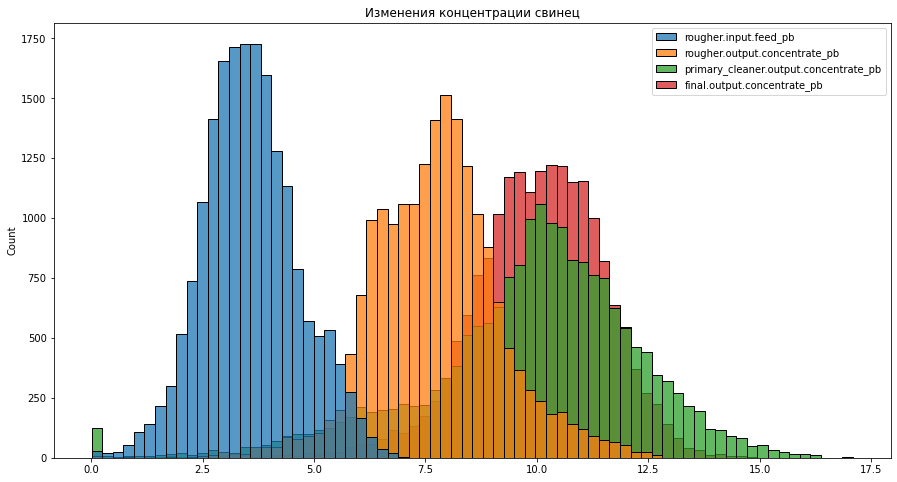

In [56]:
hist_pb = full_df[['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
plt.figure(figsize=(15,8))
ax = sns.histplot(data=hist_pb, binrange=(1,16)).set(title='Изменения концентрации свинец');

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

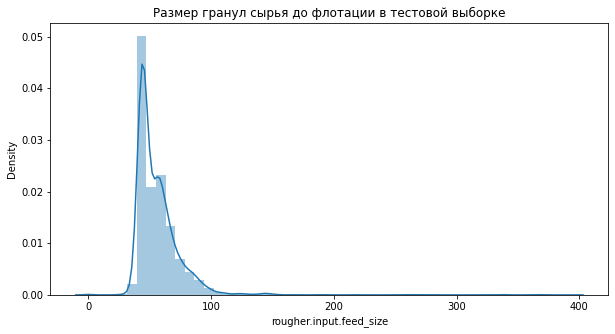

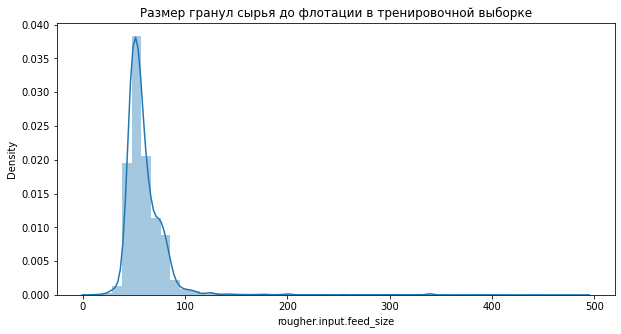

In [26]:
plt.figure(figsize=(10,5))
ax = sns.distplot(a=test_df['rougher.input.feed_size']).set(title='Размер гранул сырья до флотации в тестовой выборке')

plt.figure(figsize=(10,5))
ax = sns.distplot(a=train_df['rougher.input.feed_size']).set(title='Размер гранул сырья до флотации в тренировочной выборке');

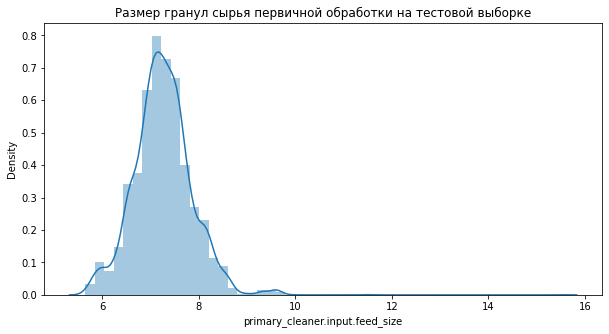

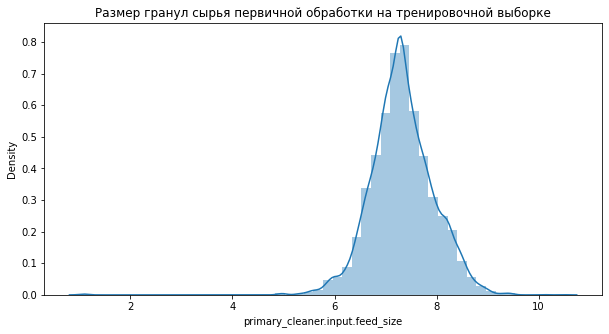

In [27]:
plt.figure(figsize=(10,5))
ax = sns.distplot(a=test_df['primary_cleaner.input.feed_size']).set(title='Размер гранул сырья первичной обработки на тестовой выборке');

plt.figure(figsize=(10,5))
ax = sns.distplot(a=train_df['primary_cleaner.input.feed_size']).set(title='Размер гранул сырья первичной обработки на тренировочной выборке');

**Вывод:** данные практически идентичный на обеих выборках

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [28]:
sum_r = full_df['rougher.output.concentrate_au'] + full_df['rougher.output.concentrate_ag'] + full_df['rougher.output.concentrate_pb'] + full_df['rougher.output.concentrate_sol']

In [29]:
sum_r_i = full_df['rougher.input.feed_pb'] + full_df['rougher.input.feed_au'] + full_df['rougher.input.feed_ag'] + full_df['rougher.input.feed_sol']

In [30]:
sum_f = full_df['final.output.concentrate_au'] + full_df['final.output.concentrate_ag'] + full_df['final.output.concentrate_pb'] + full_df['final.output.concentrate_sol']

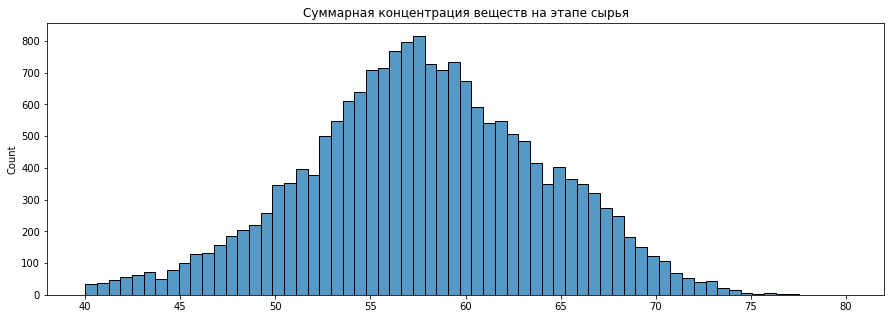

In [61]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=sum_r_i, binrange=(40,80)).set(title='Суммарная концентрация веществ на этапе сырья')

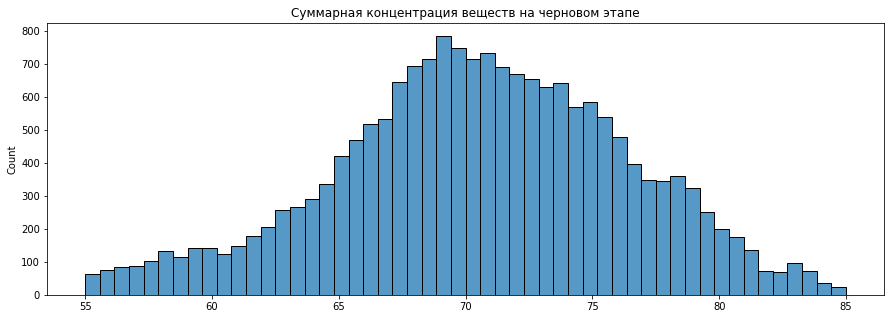

In [32]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=sum_r, binrange=(55,85)).set(title='Суммарная концентрация веществ на черновом этапе')

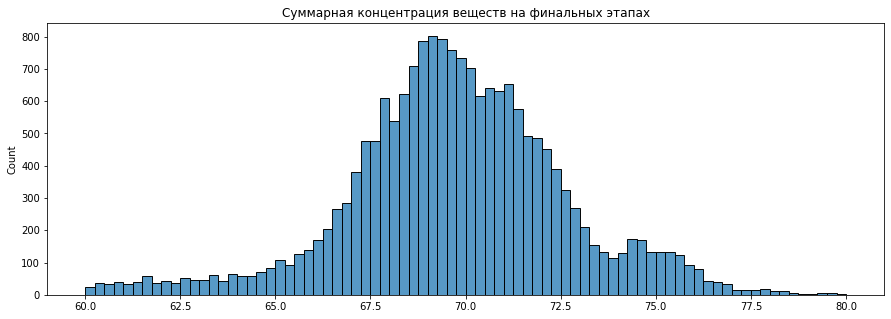

In [33]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=sum_f, binrange=(60,80)).set(title='Суммарная концентрация веществ на финальных этапах')

**Вывод:** концентрация на черногом и финальном этапе схожа между собой, на этапе сырья пиковые значения чуть ниже

## Модель

### Фунцция метрик sMAPE и итогового sMAPE

In [34]:
def smape(target, pred):
    smape = 1/(len(target)) * sum(abs(target - pred)\
                                 / ((abs(target) + abs(pred)) / 2)) * 100
    return smape

In [35]:
def final_smape(rougher, final):
    final_smape = .25 * rougher + .75 * final
    return final_smape

### Расчет модели на тренировочных данных

In [36]:
difference_features = list(set(train_df.columns) - set(test_df.columns)); 

In [37]:
train_df = train_df.drop(['date'], axis=1)

In [38]:
target_r = train_df['rougher.output.recovery']
target_f = train_df['final.output.recovery']
features = train_df.drop(difference_features, axis=1)


model_r = LinearRegression()
model_r.fit(features, target_r)
pred_r = model_r.predict(features)
print(pred_r)

[81.14271243 79.73461592 79.53447222 ... 92.0730469  91.49068281
 89.64869691]


In [39]:
model_f = LinearRegression()
model_f.fit(features, target_f)
pred_f = model_f.predict(features)
print(pred_f)

[66.11638089 64.27430472 64.38896664 ... 72.10393817 71.49933862
 70.00023481]


In [40]:
estimator = RandomForestRegressor()
parameters = {
        'max_depth': [5, 10],
        'n_estimators': [50, 100]}

rnd_r = GridSearchCV(estimator=estimator,
                              param_grid=parameters,
                              cv=5,
                              n_jobs=-1)
rnd_r.fit(features, target_r)

rnd_r_best = RandomForestRegressor(random_state=8,
                   **rnd_r.best_params_).fit(features, target_r)

pred_rnd_r = rnd_r_best.predict(features)
print(pred_rnd_r)

[81.06034971 81.06034971 81.06034971 ... 91.78139864 91.40266907
 91.78139864]


In [41]:
estimator = RandomForestRegressor()
parameters = {
        'max_depth': [5, 10],
        'n_estimators': [50, 100]}

rnd_f = GridSearchCV(estimator=estimator,
                              param_grid=parameters,
                              cv=5,
                              n_jobs=-1)
rnd_f.fit(features, target_f)

rnd_f_best = RandomForestRegressor(random_state=8,
                   **rnd_f.best_params_).fit(features, target_f)

pred_rnd_f = rnd_f_best.predict(features)
print(pred_rnd_f)

[63.58258565 63.58258565 63.58258565 ... 68.89147552 68.89147552
 68.39664574]


In [42]:
dum_f = DummyRegressor()
dum_f.fit(features, target_f)
pred_dum_f = dum_f.predict(features)
print(pred_dum_f)

[66.81371842 66.81371842 66.81371842 ... 66.81371842 66.81371842
 66.81371842]


In [43]:
dum_r = DummyRegressor()
dum_r.fit(features, target_r)
pred_dum_r = dum_r.predict(features)
print(pred_dum_r)

[84.51018363 84.51018363 84.51018363 ... 84.51018363 84.51018363
 84.51018363]


In [44]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [45]:
model_r = LinearRegression()
smape_r = cross_val_score(model_r, features, target_r, scoring=smape_scorer, cv=5).mean()

model_f = LinearRegression()
smape_f = cross_val_score(model_f, features, target_f, scoring=smape_scorer, cv=5).mean()

res = final_smape(smape_r, smape_f) * (-1)
print(f'best_resut {model_f}: {res}')

best_resut LinearRegression(): 10.027250040577739


In [46]:
rnd_r = RandomForestRegressor()
smape_r_r = cross_val_score(rnd_r, features, target_r, scoring=smape_scorer, cv=5).mean()

rnd_f = RandomForestRegressor()
smape_f_r = cross_val_score(rnd_f, features, target_f, scoring=smape_scorer, cv=5).mean()

res = final_smape(smape_r_r, smape_f_r) * (-1)
print(f'best_resut {rnd_f}: {res}')

best_resut RandomForestRegressor(): 9.003448891017046


In [47]:
dum_r = DummyRegressor()
smape_dum = cross_val_score(dum_r, features, target_r, scoring=smape_scorer, cv=5).mean()

dum_f = DummyRegressor()
smape_dum_f = cross_val_score(dum_f, features, target_f, scoring=smape_scorer, cv=5).mean()

res = final_smape(smape_dum, smape_dum_f) * (-1)
print(f'best_resut {dum_f}: {res}')

best_resut DummyRegressor(): 9.753054042643102


### Расчет на тестовых данных

In [48]:
test_df = test_df.merge(full_df[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

In [49]:
test_df = test_df.drop(['date'], axis=1)

In [50]:
target_t_r = test_df['rougher.output.recovery']
target_t_f = test_df['final.output.recovery']
features_t = test_df

In [51]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [53]:
smape_r_r = cross_val_score(rnd_r, features_t, target_t_r, scoring=smape_scorer, cv=5).mean()
smape_f_r = cross_val_score(rnd_f, features_t, target_t_f, scoring=smape_scorer, cv=5).mean()

res = final_smape(smape_r_r, smape_f_r) * (-1)
print(f'best_resut {rnd_f}: {res}')

best_resut RandomForestRegressor(): 0.11589668589190963


In [62]:
smape_dum = cross_val_score(dum_r, features_t, target_t_r, scoring=smape_scorer, cv=5).mean()
smape_dum_f = cross_val_score(dum_f, features_t, target_t_r, scoring=smape_scorer, cv=5).mean()

res = final_smape(smape_dum, smape_dum_f) * (-1)
print(f'best_resut {dum_f}: {res}')

best_resut DummyRegressor(): 4.6136656623168815


**Вывод**: в данном проекте от компания "Цифра" нам были даны данные о различных материаллах и веществах и их стадиях обработки. Входе работы были изученны данные, сделана предобработка и построенные графики для наглядного понимания происходящего. Так же было проведенно обучение на моделях и проверка их качества на метриках таких как sMAPE и итоговый sMAPE. В результате были полученные хорошие результаты, которые должны помочь компания в дальнейшей ее работе с этим проектом.